In [25]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [28]:
%%R

require(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Loading required package: tidyverse
In addition: Warning messages:
1: package ‘ggplot2’ was built under R version 4.2.3 
2: package ‘dplyr’ was built under R version 4.2.3 


In [1]:
import pandas as pd

In [19]:
df = pd.read_csv("outcomes.csv")

In [20]:
df.head()

,conditionId,question,endDate,createdAt,closedTime,volume,outcomes,clobTokenIds,prev_prices,winning_token_id,winning_outcome,correct_prediction,prediction_price
0,0x80e14125844dcb3dd3885290bc0a03626223a92b3a70...,Mexican Presidential Election: Will Claudia Sh...,2024-05-30T00:00:00Z,2024-01-08T17:51:23.211Z,2024-06-03 12:46:24+00,747925.287237,"[""Yes"", ""No""]",['66121853294113159952019114952986597006629066...,"[0.945, 0.055]",6612185329411315995201911495298659700662906692...,Yes,True,0.945
1,0xd2c10628e74b85fae2c89b7a63642960d53bd7533652...,Mexican Presidential Election: Will Xóchitl Gá...,2024-05-30T00:00:00Z,2024-01-08T17:51:23.253Z,2024-06-03 12:56:24+00,686502.795970,"[""Yes"", ""No""]",['22630580583450969756139089277784718260497974...,"[0.067, 0.933]",8302341301616374979366325632071186268124461735...,No,True,0.933
2,0xe91b26e02e0a35d164b243a1b1a70d5886441084e9da...,Finnish Presidential Election: Will Alexander ...,2024-01-25T00:00:00Z,2024-01-12T21:22:28.466Z,2024-02-11 22:45:48+00,229590.359179,"[""Yes"", ""No""]",['62471964247263026853388777058136273249949767...,"[0.925, 0.075]",6247196424726302685338877705813627324994976711...,Yes,True,0.925
3,0x15a4bdba97f192528be64824720a0c7c70b5e6889e03...,Finnish Presidential Election: Will Pekka Haav...,2024-01-26T00:00:00Z,2024-01-12T21:22:28.5Z,2024-02-11 22:46:54+00,221233.399295,"[""Yes"", ""No""]",['10192568547012047956206277235857302424258812...,"[0.065, 0.935]",4011064234361833125898186449824752866740242277...,No,True,0.935
4,0xa2279b962c1fa4616bf04f0d54a9a1f3b1697db528c4...,Finnish Presidential Election: Will Olli Rehn ...,2024-01-26T00:00:00Z,2024-01-12T21:24:28.98Z,2024-01-29 01:18:40+00,24894.852833,"[""Yes"", ""No""]",['97949868482331892937872138123082774889228648...,"[0.007, 0.993]",7067612032162731035726594630728176773193840321...,No,True,0.993


## EDA

In [9]:
df["correct_prediction"].value_counts()

correct_prediction
True     4058
False     518
Name: count, dtype: int64

In [10]:
df.to_clipboard()

In [13]:
df.groupby("correct_prediction")['volume'].mean().to_clipboard()

In [14]:
4058 / (4058 + 518) 

0.8868006993006993

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 744 rows containing non-finite outside the scale range (`stat_bin()`). 



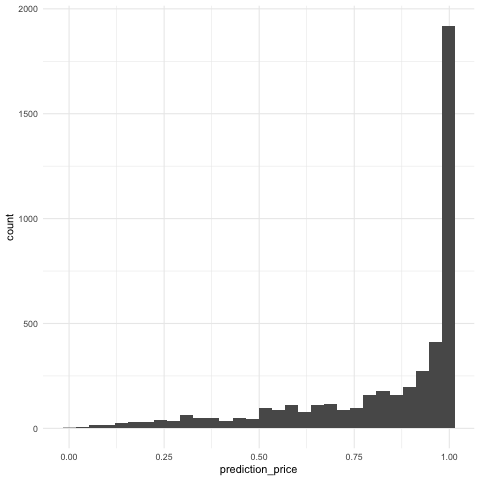

In [30]:
%%R -i df

df %>%
    ggplot(aes(x = prediction_price)) + 
    geom_histogram() + 
    theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


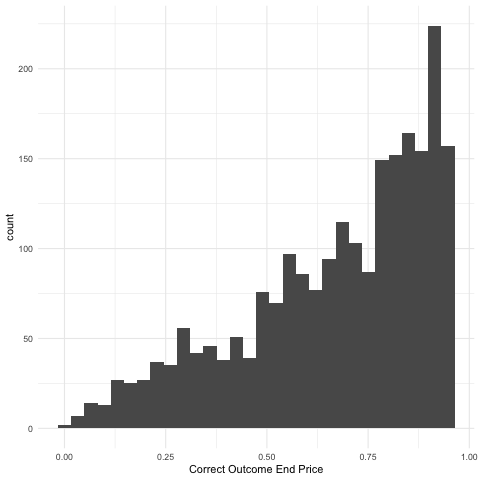

In [70]:
%%R -i df

df %>%
    filter(prediction_price < .95) %>%
    ggplot(aes(x = prediction_price)) + 
    xlab("Correct Outcome End Price") +
    geom_histogram() + 
    theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`). 



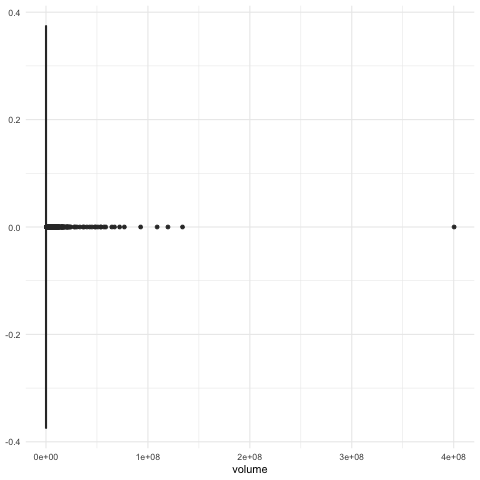

In [67]:
%%R -i df

df %>%
    ggplot(aes(x = volume)) + 
    geom_boxplot() + 
    theme_minimal()

In [132]:
%%R -i df

df %>%
    filter(prediction_price < .95) %>%
    arrange(desc(volume)) %>%
    head(10)


                                                            conditionId
431  0x9c66114d2dfe2139325cc7a408a5cd5d2e73b55d919e2141b3a0ed83fc15895d
835  0xc53c00d3ed7df96cb528e049ca2d8a6056b620a82bfffd3ad58d35c5f92c02d6
833  0x2010ff3939e8e664dd57369aa907bbaa6d03ae18be27fe3ab2f4cdcb95a8b2ab
831  0xafde9e890a2db339b6515cd75c2d09574dcaf731b483a1ef6ea0a3abc5ec8abd
2187 0xab66a7d5745fc4da8a30a67665ee1de894b740644e643a6c6ec39b17212e4df5
358  0x02bc0bbff054877a08cdc4f9ccf4e7606804bc05c27f5faccf26c6e1666a5558
1067 0x57f90c89879a5b5e69fad9c2a261fa6f44f3653001aa3a02446aed92aaff21bf
359  0xa923afcb8297e3ade170f2f8c088f3c277557fadef2c67054d72cc59f8504b2b
1066 0x1b60fead57018405d3555612030acdf7f46a35955bdc697445708be31188cd71
1274 0x6cc501fa617e3a46ececf6e3990fe1afeeaa6bc897d3c7049c005fd1bdc42c2f
                                                                      question
431                                            Will Bitcoin hit $100k in 2024?
835  Will a Democrat win the popular vote and a Re

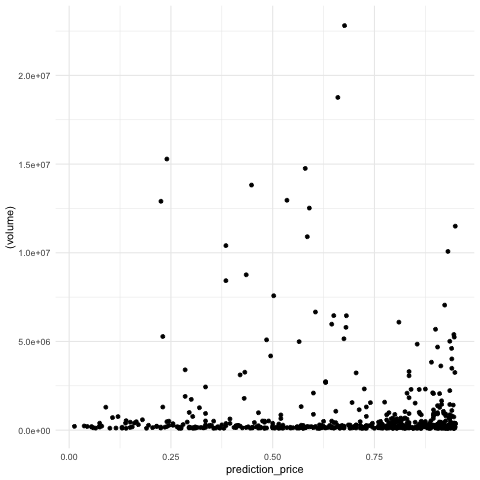

In [46]:
%%R -i df

df %>%
    filter(volume > 100000,
          prediction_price < .95) %>%
    ggplot(aes(x = prediction_price , y = (volume))) + 
    geom_point() + 
    theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


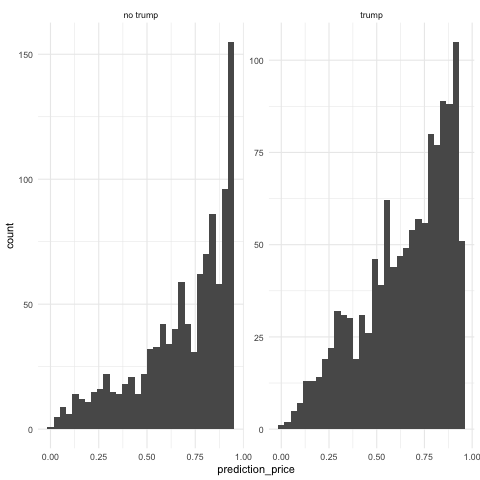

In [53]:
%%R -i df
df <- df %>%
    mutate(trump_flag = ifelse(grepl("trump",tolower(question)),"trump","no trump")) 

df %>%
    filter(prediction_price < .95) %>%
    ggplot(aes(x = prediction_price)) + 
    geom_histogram() + 
    facet_wrap(~trump_flag, scales = "free") +
    theme_minimal()

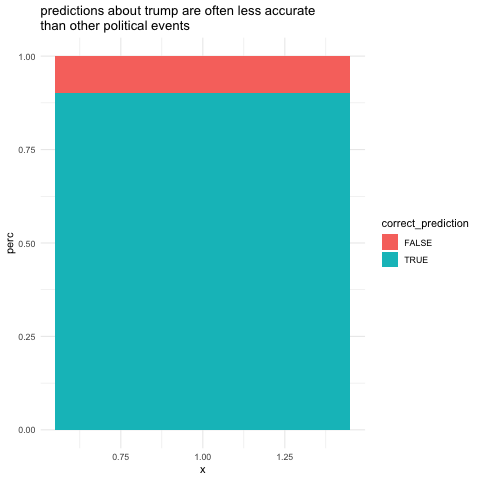

In [99]:
%%R -i df

df %>%
    group_by(correct_prediction) %>%
    tally() %>%
    mutate(perc = n / sum(n))  %>%
    ggplot(aes(x = 1, y = perc, fill = correct_prediction)) + 
    geom_bar(stat = "identity", position = "fill") + 
    ggtitle("predictions about trump are often less accurate\nthan other political events") + 
    theme_minimal()

In [149]:
%%R -i df

df %>%
    filter(prediction_price < .95, 
           volume > 100000) %>%
    group_by(correct_prediction) %>%
    tally() %>%
    mutate(perc = n / sum(n))  %>%
    ggplot(aes(x = 1, y = perc, fill = correct_prediction)) + 
    geom_bar(stat = "identity", position = "fill") + 
    theme_minimal()

# A tibble: 2 × 3
  correct_prediction     n  perc
  <lgl>              <int> <dbl>
1 FALSE                132 0.248
2 TRUE                 400 0.752


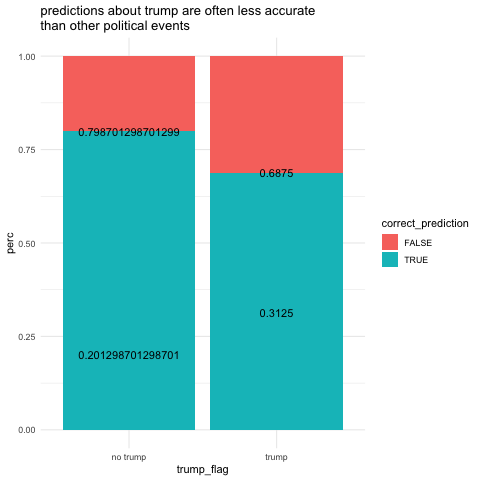

In [154]:
%%R 

df <- df %>%
    mutate(trump_flag = ifelse(grepl("trump",tolower(question)),"trump","no trump")) 

df %>%
    filter(prediction_price < .95, 
           volume > 100000) %>%
    group_by(trump_flag, correct_prediction) %>%
    tally() %>%
    group_by(trump_flag) %>%
    mutate(perc = n / sum(n)) %>%
    ggplot(aes(x = trump_flag, y = perc, fill = correct_prediction)) + 
    geom_bar(stat = "identity", position = "fill") + 
    geom_text(aes(label = perc))+
    ggtitle("predictions about trump are often less accurate\nthan other political events") + 
    theme_minimal()

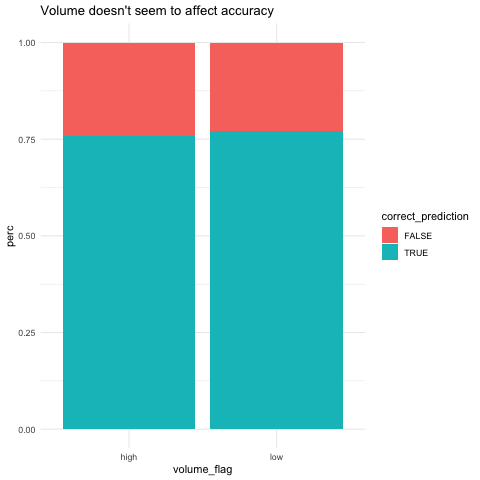

In [136]:
%%R 

df <- df %>%
    mutate(volume_flag = ifelse(volume > 500000,"high","low")) 

df %>%
    filter(prediction_price < .95) %>%
    group_by(volume_flag, correct_prediction) %>%
    tally() %>%
    group_by(volume_flag) %>%
    mutate(perc = n / sum(n))  %>%
    ggplot(aes(x = volume_flag, y = perc, fill = correct_prediction)) + 
    geom_bar(stat = "identity", position = "fill") + 
    ggtitle("Volume doesn't seem to affect accuracy") +
    theme_minimal()

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


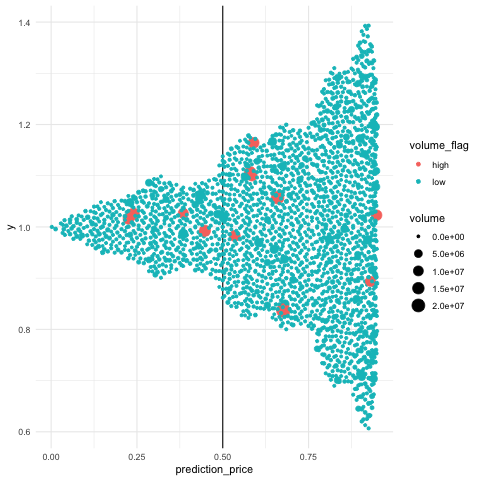

In [129]:
%%R 
library(ggbeeswarm)

df %>%
    filter(prediction_price < .95) %>%
    mutate(volume_flag = ifelse(volume>10000000, 'high', 'low')) %>%
    ggplot(aes(x = prediction_price, y = 1, size = volume, color = volume_flag)) + 
    geom_vline(xintercept =.5) +
    geom_quasirandom() +
    theme_minimal()

In [141]:
%%R 

df %>%
    arrange((volume)) %>%
    head(10)

                                                            conditionId
471  0x735f955b6d4bce5222b6d8f7492b67b8c85b38877d8bc3025f3e014442b9c333
519  0x2446e23bff08c2ab0123760c38e46a01193b3a7d844c1fddb09f24e1ec598a8f
527  0x030ffcd3455536154e7bd32f363c2559db92bf64a698f1d5064b725ed99f70ee
528  0x4c76ab679feeb05cec4aab8bb3e7da020c64943cd18bb9c80b14573711e04c65
4092 0xd1ac4ec9f4494ab0bf1f091bc838126714e82e967246b5682c40891de92d9e63
4589 0x0e793dd6143aaa987363c99d1d9e6c9ad418dc430b9f81ba389620bc26d8122c
389  0x1905dc3dcca96bc97227c41f4ef4c1687e4a489a9f928b7d64a0d1a134be69e9
4765 0xcb30177e892c07614031a4a5e6e1fdc9bb045597c116b3a17c4ad292f0c76f1e
1043 0x1efc21f4ad36e5f7ec96ad317d2935cebd732804054972bd5b0a3316fbb02173
4763 0xe513b96bc9b36dcffcd51e45b3524afb3eda55d3268c86dbaf342fe3c3e5ee73
                                                                  question
471                                tremp vs. boden - Most Liked Post Today
519  Will another candidate win the Mississippi Republican

In [142]:
# individual markets